# Class for linear models
### Linear Regression
### Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
class LinearRegression:
    def __init__(self):
        self.iterations = 500
        self.learning_rate = 0.01  
    def fit(self,X_train,y_train):
        m,n = X_train.shape
        theta = np.random.randn(n)
        X_with_bias = np.c_[np.ones(m),X_train]
        theta_with_bias = np.insert(theta,0,0)
        cost = []
        
        #Loop over the number of iterations
        for i in range(self.iterations):
            h = np.dot(X_with_bias,theta_with_bias)
            error = h - y_train            
            J = (1/m)*np.sum(error**2)
            grad = (2/m)*np.dot(X_with_bias.T,error)
            theta_with_bias = theta_with_bias - self.learning_rate*grad
            cost.append(J)
         
        #Plot the cost values
        plt.plot(cost)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        
        return theta_with_bias
    
    def predict(self,X_test,theta):        
        m_test = X_test.shape[0]
        X_test_bias = np.c_[np.ones(m_test),X_test]
        pred = np.dot(X_test_bias,theta)
        return pred

In [333]:
class LogisticRegression:
    def __init__(self):
        self.iterations = 1000
        self.learning_rate = 0.01
    
    #Sigmoid function
    def sigmoid(self,x):
        z = 1/(1 + np.exp(-x))
        return z

    def fit(self,X,y):
        m,n = X.shape
        theta = np.random.randn(n) 
        X_with_bias = np.c_[np.ones(m),X] 
        theta_with_bias = np.insert(theta,0,0)
        print(theta_with_bias)
        cost = []
        for i in range(self.iterations):
            h = np.dot(X_with_bias,theta_with_bias)
            z = self.sigmoid(h)    
            J = (-1/m)*np.sum(y*np.log(z)+(1-y)*np.log(1-z))
            error = z - y
            grad = (1/m)*np.dot(X_with_bias.T,error)
            theta_with_bias =  theta_with_bias - self.learning_rate*grad
            cost.append(J)
            
        plt.plot(cost)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        return theta_with_bias
    
    def predict(self,X_test,theta):
        m_test = X_test.shape[0]
        X_test_bias = np.c_[np.ones(m_test),X_test]
        pred = self.sigmoid(np.dot(X_test_bias,theta))
        return (pred >= 0.5 )*1

In [121]:
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

In [232]:
x, y = make_regression(n_samples = 200,n_features = 1,noise = 50,bias = 100,random_state = 0)

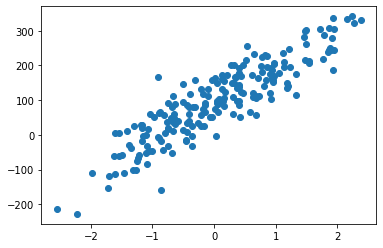

In [233]:
plt.scatter(x,y)
plt.show()

In [234]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 0)

In [235]:
linear = LinearRegression()

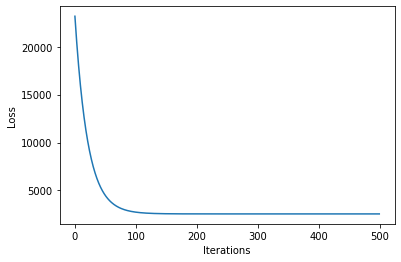

In [236]:
theta = linear.fit(x_train,y_train)

In [237]:
preds = linear.predict(x_test,theta)

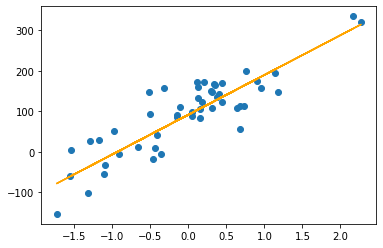

In [238]:
plt.scatter(x_test, y_test)
plt.plot(x_test, preds, color = 'orange')
plt.show()

In [297]:
x, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1)

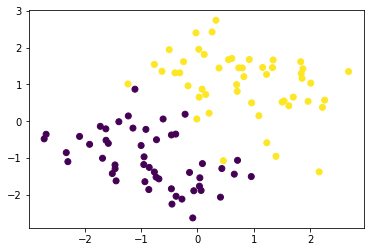

In [298]:
plt.scatter(x[:,1],x[:,0], c = y)
plt.show()

In [334]:
logistic_regression = LogisticRegression()

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

[ 0.          0.73246309 -0.39964553]


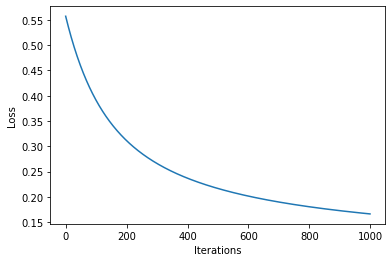

In [336]:
theta = logistic_regression.fit(x_train,y_train)

In [318]:
preds = logistic_regression.predict(x_test,theta)

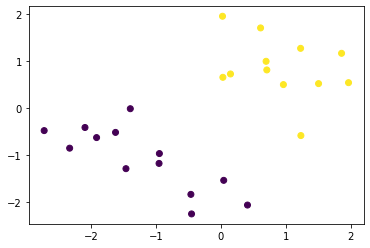

In [322]:
plt.scatter(x_test[:,1],x_test[:,0], c = y_test)
plt.show()

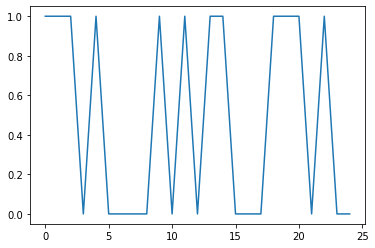

In [384]:
a = -theta[0]/theta[2]
b = -theta[0]/theta[1]
left_right = np.array([a,b])

In [392]:
left_right

array([-0.01688817, -0.01094295])

In [393]:
boundary = -(theta[1] * left_right + theta[0]) / theta[1]

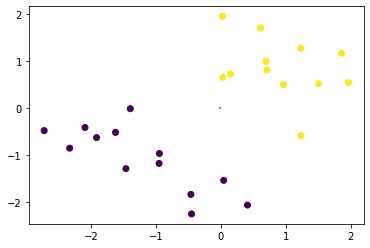

In [395]:
plt.scatter(x_test[:,1],x_test[:,0], c = y_test)
plt.plot(left_right,boundary)

In [383]:
left_right

array([-0.01688817])